In [1]:
!pip install -U -q scipy

You should consider upgrading via the '/Users/gerard/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [115]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('./test_exp(20,30,50,300)_costF-1')
experimentProposals = mat['experimentBestProposals'][0]
experimentFits = mat['experimentBestFits'][0]
experimentProfiles = mat['experimentBestShapes'][0]
freq_cut = mat['cutFreq'][0][0]
max_generations = mat['maxGen'][0][0]
total_proposals = len(experimentProposals[0][0])
total_experiments = len(mat['experimentBestShapes'][0])
print("Cut freq: "+str(freq_cut))
print("Max gen: "+str(max_generations))
print("Proposals/gen: "+str(total_proposals))
print("Total experiments: "+str(total_experiments))

dataset = []


for iExperiment in range(len(experimentProposals)):
    nValue = []
    fit = []
    profileABH = []
    runout = experimentProposals[iExperiment][0]
    for iGen in range(len(runout)):
        experiment = runout[iGen][0]
        nValue.append(experiment[1][0][0])
        fit.append(experimentFits[iExperiment][0][iGen][0][0])
        profileABH.append(experimentProfiles[iExperiment][0][iGen][0])
    experiments = {
        'nValues': nValue,
        'fit': fit,
        'profileABH':profileABH
    }
    dataset.append(experiments)


Cut freq: 300
Max gen: 30
Proposals/gen: 31
Total experiments: 20


2.098275519647572
0.08216979926422392


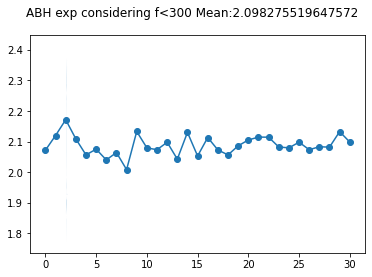

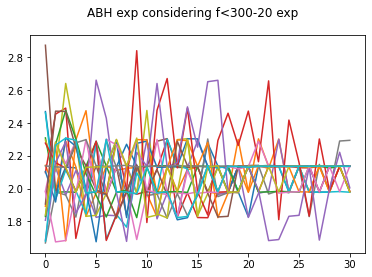

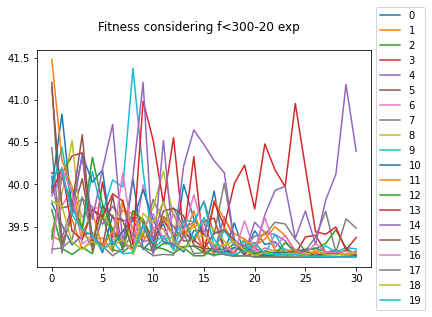

In [116]:
expNMean = []
for exp in dataset:
    expNMean.append(exp['nValues'][total_proposals-1])
print(np.mean(expNMean, axis=0))
print(np.std(expNMean, axis=0))

expNValues = []
for iRadius in range(len(dataset[0]['nValues'])):
    generation = []
    for experiment in dataset:
        generation.append(experiment['nValues'][iRadius])
    expNValues.append(generation)
    
nMean = []
nStdUp = []
nStdDown = []

for exp in expNValues:
    nMean.append(np.mean(exp, axis=0))
    nStdUp.append(np.mean(exp, axis=0)+np.std(exp, axis=0))
    nStdDown.append(np.mean(exp, axis=0)-np.std(exp, axis=0))

fig, (ax) = plt.subplots(1,1)
fig.suptitle('ABH exp considering f<'+str(freq_cut)+' Mean:'+str(np.mean(expNMean)))
ax.fill_between(nMean,nStdUp,nStdDown , alpha=0.2)
ax.plot(nMean,'o-')

fig, (ax) = plt.subplots(1,1)
fig.suptitle('ABH exp considering f<'+str(freq_cut)+'-'+str(total_experiments)+' exp')


for data in dataset:
    ax.plot(data['nValues'],'-')

fig, (ax) = plt.subplots(1,1)
fig.suptitle('Fitness considering f<'+str(freq_cut)+'-'+str(total_experiments)+' exp')
current = 0
for data in dataset:
    ax.plot(data['fit'],'-')
plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))


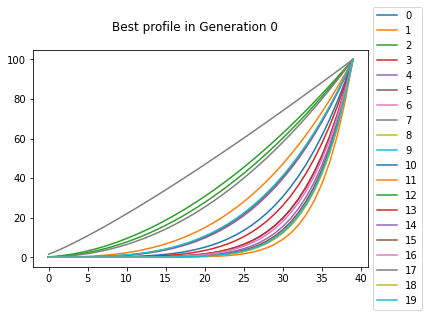

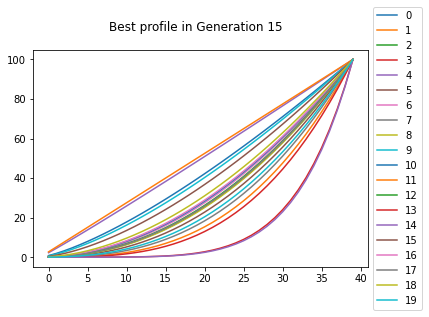

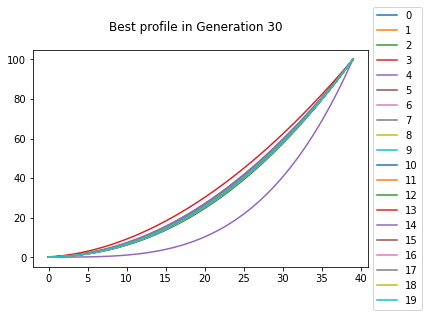

In [117]:
totalGen = len(experimentProfiles[0][0])

fig, (ax) = plt.subplots(1,1)
gen = 0
fig.suptitle('Best profile in Generation '+ str(gen))
current = 0
for experiment in experimentProfiles:
    for data in experiment[0][gen]:
        ax.plot(data)
    plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))

fig, (ax) = plt.subplots(1,1)
gen = int(totalGen*0.5)
fig.suptitle('Best profile in Generation '+ str(gen))
current = 0
for experiment in experimentProfiles:
    for data in experiment[0][gen]:
        ax.plot(data)
    plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))
    

fig, (ax) = plt.subplots(1,1)
gen = totalGen-1
fig.suptitle('Best profile in Generation '+ str(gen))
current = 0
for experiment in experimentProfiles:
    for data in experiment[0][gen]:
        ax.plot(data)
    plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))


## Results from non exponential

In [121]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

testName = "test_growing(20,50,50,500)_F4"
mat = scipy.io.loadmat('./'+ testName)
experimentProposals = mat['experimentBestProposals'][0]
experimentFits = mat['experimentBestFits'][0]
experimentProfiles = mat['experimentBestShapes'][0]
freq_cut = mat['cutFreq'][0][0]
max_generations = mat['maxGen'][0][0]
total_proposals = len(experimentProposals[0][0])
total_experiments = len(mat['experimentBestShapes'][0])
print("Cut freq: "+str(freq_cut))
print("Max gen: "+str(max_generations))
print("Proposals/gen: "+str(total_proposals))
print("Total experiments: "+str(total_experiments))

dataset = []


for iExperiment in range(len(experimentProposals)):
    nValue = []
    fit = []
    profileABH = []
    runout = experimentProposals[iExperiment][0]
    for iGen in range(len(runout)):
        experiment = runout[iGen][0]
        nValue.append(experiment[1][0][0])
        fit.append(experimentFits[iExperiment][0][iGen][0][0])
        profileABH.append(experimentProfiles[iExperiment][0][iGen][0])
    experiments = {
        'nValues': nValue,
        'fit': fit,
        'profileABH':profileABH
    }
    dataset.append(experiments)


Cut freq: 500
Max gen: 50
Proposals/gen: 52
Total experiments: 20


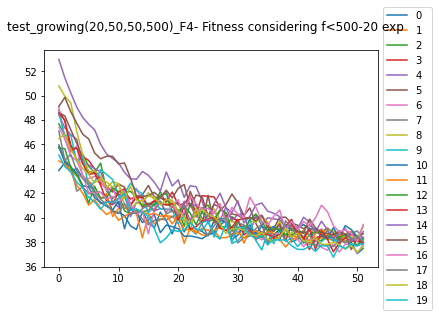

In [122]:
for data in dataset:
    ax.plot(data['nValues'],'-')

    
fig, (ax) = plt.subplots(1,1)
fig.suptitle(testName +'- Fitness considering f<'+str(freq_cut)+'-'+str(total_experiments)+' exp')
current = 0

for data in dataset:
    ax.plot(data['fit'],'-')
plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))



## Best profiles acording generations

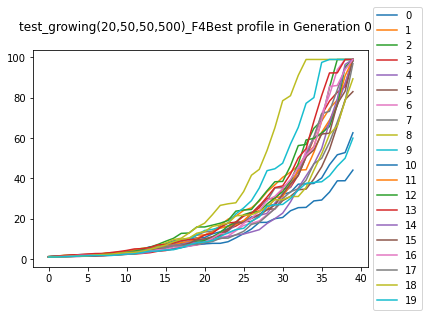

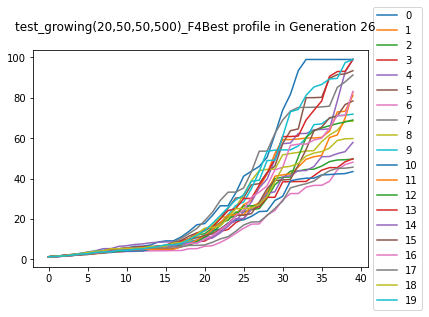

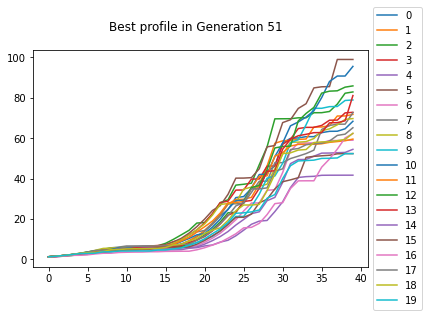

In [123]:
totalGen = len(experimentProfiles[0][0])

fig, (ax) = plt.subplots(1,1)
gen = 0
fig.suptitle(testName +'Best profile in Generation '+ str(gen))
current = 0
for experiment in experimentProfiles:
    for data in experiment[0][gen]:
        ax.plot(data)
    plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))

fig, (ax) = plt.subplots(1,1)
gen = int(totalGen*0.5)
fig.suptitle(testName +'Best profile in Generation '+ str(gen))
current = 0
for experiment in experimentProfiles:
    for data in experiment[0][gen]:
        ax.plot(data)
    plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))
    

fig, (ax) = plt.subplots(1,1)
gen = totalGen-1
fig.suptitle('Best profile in Generation '+ str(gen))
current = 0
for experiment in experimentProfiles:
    for data in experiment[0][gen]:
        ax.plot(data)
    plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))


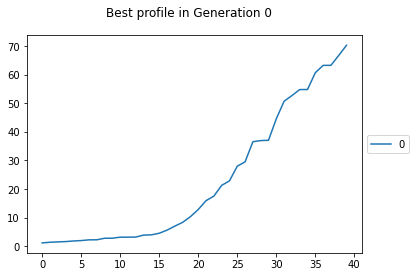

In [57]:
fig, (ax) = plt.subplots(1,1)
gen = 0
fig.suptitle('Best profile in Generation '+ str(gen))
current = 0

for data in experimentProfiles[0][0][20]:
    ax.plot(data)
plt.legend(range(len(dataset)),loc='center left', bbox_to_anchor=(1, 0.5))